# BioGeoChemical Model (Mercator-Pisces)

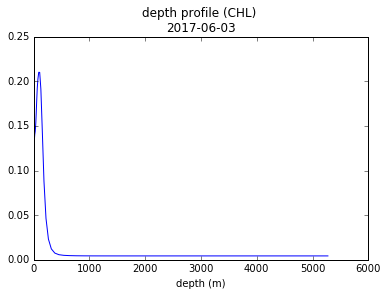

In [7]:
import sys
sys.path.append('../../')
import db
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot(z, y, y_std):
    plt.plot(z, y)
    plt.title(('depth profile (%s) \n' + dt) % field)
    plt.xlabel('depth (m)')
    plt.show()



############# set parameters ###############
table = 'tblPisces_NRT'
field = 'CHL'   # Chlorophyll concentration - Mean of the binned pixels
#field = 'Si'    # Mole concentration of Silicalte
#field = 'PHYC'  # Mole concentration of phytoplankton as carbon 
#field = 'PP'    # Net primary productivity of Carbon per unite volume 
#field = 'O2'    # Mole concentration of dissolved Oxygen
#field = 'PO4'   # Mole concentration of Phosphate 
#field = 'NO3'   # Mole concentration of dissolved Nitrate  
#field = 'Fe'    # Mole concentration of dissolved Iron 
dt = '2017-06-03'
lat1, lat2, lon1, lon2 = 10, 55, -180, -100  
############################################





####################################################################################################### 
levels = [0.494024991989, 1.54137504101, 2.64566898346, 3.81949496269, 5.07822418213, 6.44061422348, 7.92956018448, 9.5729970932, 11.404999733, 13.4671401978, 15.8100700378, 18.4955596924, 21.5988197327, 25.2114105225, 29.4447307587, 34.4341506958, 40.3440513611, 47.3736915588, 55.764289856, 65.8072662354, 77.8538513184, 92.3260726929, 109.729301453, 130.666000366, 155.850692749, 186.125595093, 222.475204468, 266.040313721, 318.127410889, 380.213012695, 453.937713623, 541.088928223, 643.566772461, 763.333129883, 902.339294434, 1062.43994141, 1245.29101562, 1452.25097656, 1684.28405762, 1941.89294434, 2225.07788086, 2533.3359375, 2865.70288086, 3220.82006836, 3597.03198242, 3992.48388672, 4405.22412109, 4833.29101562, 5274.78417969, 5727.91699219]
y = np.array([])
y_std = np.array([])
for depth in levels:
    query = 'EXEC uspDepthProfile ?, ?, ?, ?, ?, ?, ?, ?'
    args = [table, field, dt, str(lat1), str(lat2), str(lon1), str(lon2), str(depth)]        
    df = db.dbFetchStoredProc(query, args)
    df = pd.DataFrame.from_records(df, columns=['lat', 'lon', 'depth', field])
    try:
        if len(df[field]) > 0:                
            tempY = np.nanmean(df[field])
        else:
            tempY = np.nan
    except:
        tempY = np.nan   
    if abs(tempY) > 1e30:       ## remove outliers (extremes)
        tempY = np.nan           
    y = np.append(y, tempY)
    try:
        if len(df[field]) > 0:
            tempY_std = np.nanstd(df[field])
        else:
            tempY_std = np.nan
    except:
        tempY_std = np.nan        
    if abs(tempY_std) > 1e30:       ## remove outliers (extremes)
        tempY_std = np.nan   
    y_std = np.append(y_std, tempY_std)
plot(levels, y, y_std)
####################################################################################################### 
    